In [16]:
# ! pip install segmentation_models_pytorch
# ! pip install tqdm
# ! pip install matplotlib
# ! pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 7.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 7.1 MB/s eta 0:00:0000:0100:01m


In [1]:
# Create data directory
!mkdir -p data

# Download the dataset files
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz -P data/
!wget https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz -P data/

# Extract both archives into .data directory
!cd data && tar -xf images.tar.gz
!cd data &&tar -xf annotations.tar.gz

# Optional: Remove the compressed files to save space


--2025-03-29 18:36:34--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2025-03-29 18:36:35--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘data/images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  16.5MB/s    in 75s     

2025-03-29 18:37:50 (10.0 MB/s) - ‘data/images.tar.gz’ saved [791918971/791918971]

--2025-03-29 18:37:50--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
Resol

In [ ]:
import xml.etree.ElementTree as ET
import os

bound_box_dir = '/workspace/ADL-group-project/data/annotations/xmls'
for filename in os.listdir(bound_box_dir):
    tree = ET.parse(os.path.join(bound_box_dir, filename))
    root = tree.getroot()
    bndbox = root[5][5]
    print(filename, bndbox.text)

# annotation.object.bndbox
# bndbox.xmin, bndbox.xmax, bndbox.ymin, bndbox.ymax

Abyssinian_1.xml 0
Abyssinian_10.xml 0
Abyssinian_100.xml 0
Abyssinian_101.xml 0
Abyssinian_102.xml 0
Abyssinian_103.xml 0
Abyssinian_105.xml 0
Abyssinian_106.xml 0
Abyssinian_107.xml 0
Abyssinian_108.xml 0
Abyssinian_109.xml 0
Abyssinian_11.xml 0
Abyssinian_110.xml 0
Abyssinian_111.xml 0
Abyssinian_112.xml 0
Abyssinian_113.xml 0
Abyssinian_114.xml 0
Abyssinian_115.xml 0
Abyssinian_116.xml 0
Abyssinian_117.xml 0
Abyssinian_118.xml 0
Abyssinian_119.xml 0
Abyssinian_12.xml 0
Abyssinian_120.xml 0
Abyssinian_121.xml 0
Abyssinian_122.xml 0
Abyssinian_123.xml 0
Abyssinian_124.xml 0
Abyssinian_125.xml 0
Abyssinian_126.xml 0
Abyssinian_127.xml 0
Abyssinian_128.xml 0
Abyssinian_129.xml 0
Abyssinian_13.xml 0
Abyssinian_130.xml 0
Abyssinian_131.xml 0
Abyssinian_132.xml 0
Abyssinian_133.xml 0
Abyssinian_134.xml 0
Abyssinian_135.xml 0
Abyssinian_136.xml 0
Abyssinian_137.xml 0
Abyssinian_138.xml 0
Abyssinian_139.xml 0
Abyssinian_14.xml 0
Abyssinian_140.xml 0
Abyssinian_141.xml 0
Abyssinian_142.xml 0

In [3]:
import torch
import torch.nn as nn
import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


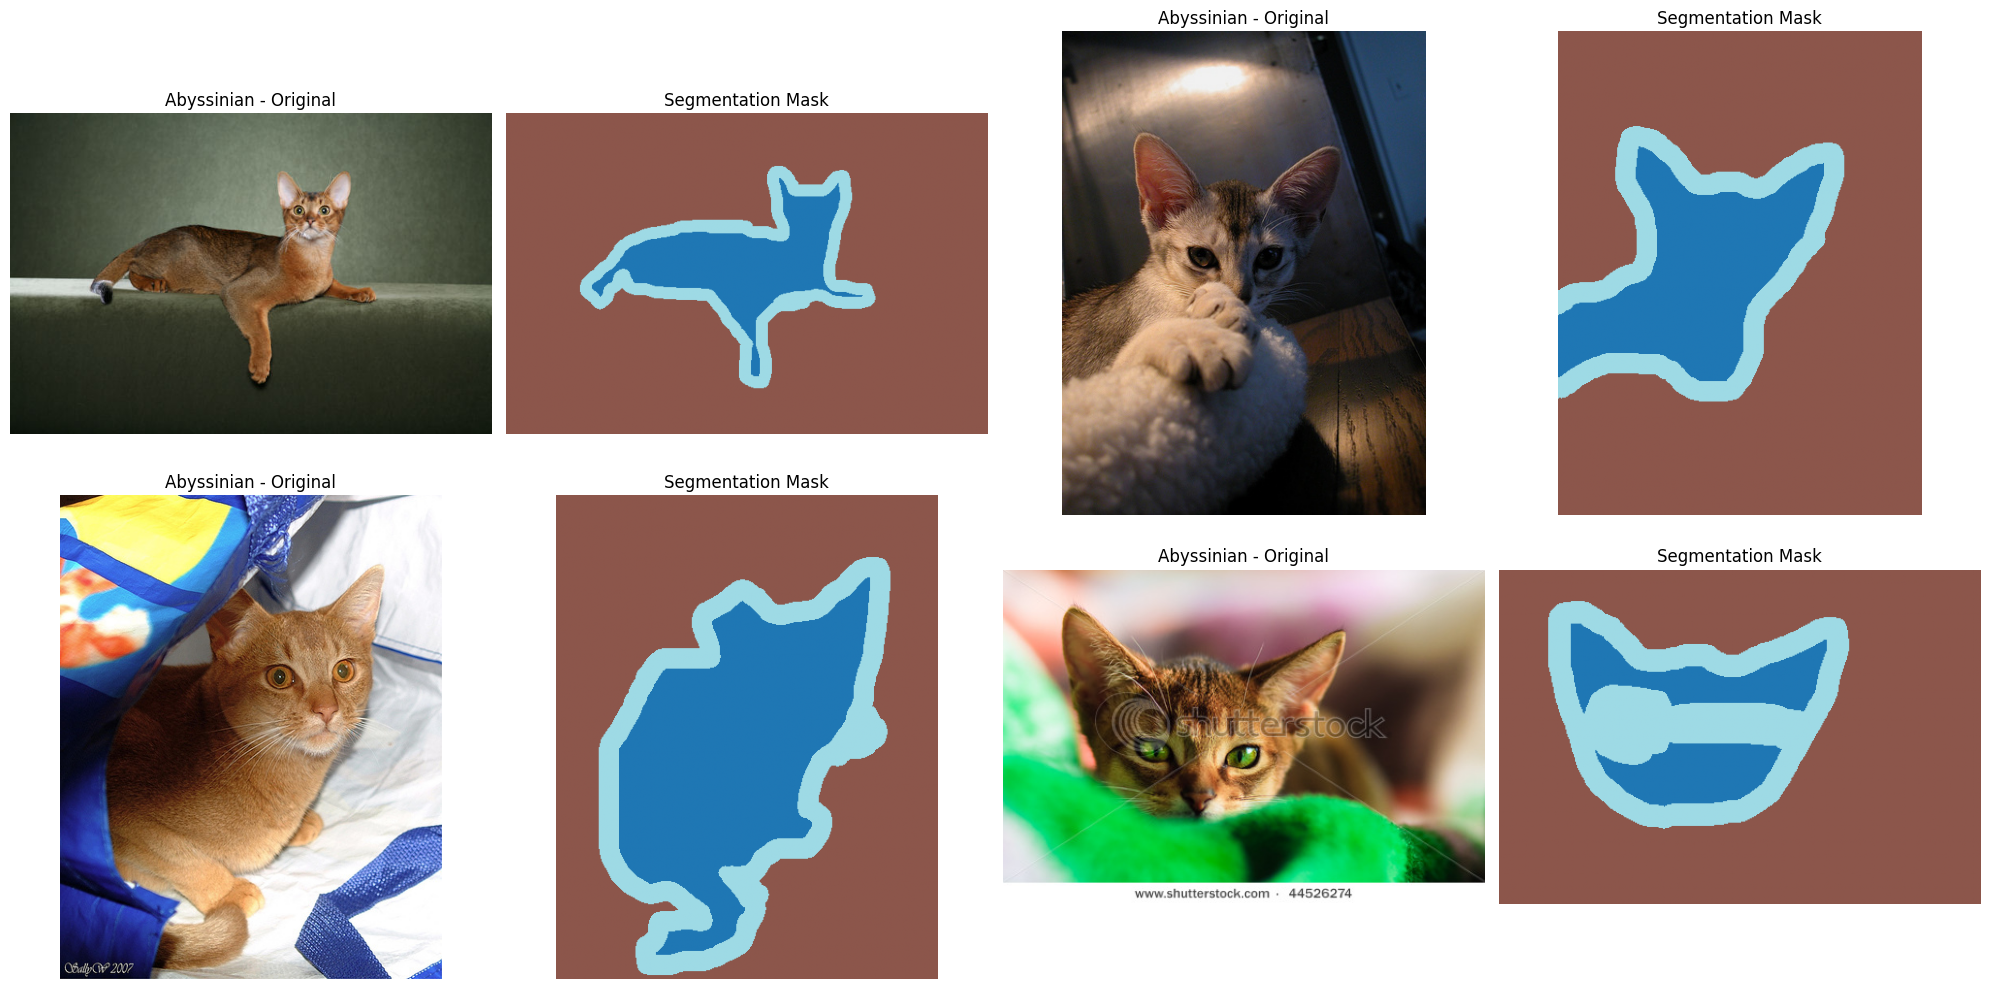


Dataset Annotations Include:
1. Species/Breed Names (37 categories)
2. Head Bounding Box (ROI)
3. Trimap Segmentation:
   - 1: Pet
   - 2: Background
   - 3: Border/Undefined


In [ ]:
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.encoders import get_preprocessing_fn

import os
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import ToTensor
import numpy as np

# Set up the data directories
data_dir = 'data/images'
annotation_dir = 'data/annotations'  # Add annotations directory

# Get list of image files
image_files = sorted([f for f in os.listdir(data_dir) if f.endswith(('.jpg', '.png'))])[:4]

# Create a figure with 2x4 subplots (original image + trimap for each row)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Load and display first 4 images with their annotations
for idx, img_file in enumerate(image_files):
    # Load original image
    img_path = os.path.join(data_dir, img_file)
    img = Image.open(img_path)

    # Load trimap segmentation
    trimap_file = img_file.replace('.jpg', '.png')
    trimap_path = os.path.join(annotation_dir, 'trimaps', trimap_file)
    trimap = Image.open(trimap_path)

    # Plot in corresponding subplots
    row = idx // 2
    col = idx % 2 * 2  # Multiply by 2 to leave space for annotations

    # Plot original image
    axes[row, col].ims  how(img)
    axes[row, col].axis('off')
    axes[row, col].set_title(f'{img_file.split("_")[0]} - Original')

    # Plot trimap segmentation
    axes[row, col + 1].imshow(trimap, cmap='tab20')
    axes[row, col + 1].axis('off')
    axes[row, col + 1].set_title('Segmentation Mask')

plt.tight_layout()
plt.show()

# Optional: Display annotation statistics
def print_annotation_info():
    print("\nDataset Annotations Include:")
    print("1. Species/Breed Names (37 categories)")
    print("2. Head Bounding Box (ROI)")
    print("3. Trimap Segmentation:")
    print("   - 1: Pet")
    print("   - 2: Background")
    print("   - 3: Border/Undefined")

print_annotation_info()

In [5]:
# Set up dataset and dataloader
import os
from torch.utils.data import Dataset
import torch
from PIL import Image
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


class PetSegmentationDataset(Dataset):
    def __init__(self, data_dir, annotation_dir, transform):
        self.data_dir = data_dir
        self.annotation_dir = annotation_dir
        self.image_files = [f for f in os.listdir(
            data_dir) if f.endswith(('.jpg', '.png'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load image
        img_path = os.path.join(self.data_dir, self.image_files[idx])
        img = Image.open(img_path).convert('RGB')

        # Load trimap
        trimap_file = self.image_files[idx].replace('.jpg', '.png')
        trimap_path = os.path.join(self.annotation_dir, 'trimaps', trimap_file)
        trimap = Image.open(trimap_path)

        # Apply transforms
        img = self.transform(img)
        trimap = torch.tensor(
            np.array(trimap.resize((256, 256))), dtype=torch.long)
        trimap[trimap == 1] = 0
        trimap[trimap == 2] = 1
        trimap[trimap == 3] = 2

        return img, trimap


class InMemoryPetSegmentationDataset(Dataset):
    def __init__(self, data_dir, annotation_dir, transform):
        self.transform = transform
        self.samples = []

        image_files = [f for f in os.listdir(
            data_dir) if f.endswith(('.jpg', '.png'))]

        for fname in tqdm.tqdm(image_files[:]):
            # Load image
            img_path = os.path.join(data_dir, fname)
            img = Image.open(img_path).convert('RGB')
            img = transform(img).to(device)

            # Load and preprocess trimap
            # ensure file extension matches annotation
            trimap_file = fname.replace('.jpg', '.png')
            trimap_path = os.path.join(annotation_dir, 'trimaps', trimap_file)
            trimap = Image.open(trimap_path).resize((256, 256))
            trimap = np.array(trimap)
            trimap = torch.tensor(trimap, dtype=torch.long).to(device)
            trimap[trimap == 1] = 0
            trimap[trimap == 2] = 1
            trimap[trimap == 3] = 2

            # Save original image (not transformed yet) and processed trimap
            self.samples.append((img, trimap))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img, trimap = self.samples[idx]
        return img, trimap

In [6]:

# Visualization function
def visualize_predictions(model, dataset, num_samples=4):
    model.eval()
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5*num_samples))

    for idx in range(num_samples):
        img, true_mask = dataset[idx]
        img = img.cpu()  # Move to CPU
        true_mask = true_mask.cpu()
        with torch.no_grad():
            pred = model(img.unsqueeze(0).to(device))
            pred_mask = torch.argmax(pred, dim=1).squeeze().cpu()

        img = img * torch.tensor([0.229, 0.224, 0.225])[:, None, None] + torch.tensor([0.485, 0.456, 0.406])[:, None, None]  # Reverse normalization
        img = img.clip(0, 1)  # Clip to valid range

        # Plot original image
        axes[idx, 0].imshow(img.permute(1, 2, 0))
        axes[idx, 0].set_title('Original Image')
        axes[idx, 0].axis('off')

        # Plot true mask
        axes[idx, 1].imshow(true_mask, cmap='tab20')
        axes[idx, 1].set_title('True Mask')
        axes[idx, 1].axis('off')

        # Plot predicted mask
        axes[idx, 2].imshow(pred_mask, cmap='tab20')
        axes[idx, 2].set_title('Predicted Mask')
        axes[idx, 2].axis('off')

    plt.tight_layout()
    plt.show()


def evaluate_model_metrics(model, dataloader, device):
    """
    Evaluate model performance using various classification metrics.

    Args:
        model: PyTorch model to evaluate
        dataloader: PyTorch DataLoader containing validation/test data
        device: Device to run model on ('cuda' or 'cpu')

    Returns:
        dict: Dictionary containing computed metrics
    """
    from sklearn.metrics import accuracy_score, recall_score, jaccard_score, f1_score
    import numpy as np

    model.eval()

    # Initialize metric accumulators
    total_accuracy = 0
    total_recall = 0
    total_jaccard = 0
    total_f1 = 0
    total_samples = 0

    with torch.no_grad():
        for images, targets in tqdm.tqdm(dataloader):
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            targets = targets.cpu().numpy()  # Move targets to CPU

            # Calculate metrics for the batch and accumulate
            total_accuracy += accuracy_score(targets.flatten(), preds.flatten()) * len(targets)
            total_recall += recall_score(targets.flatten(), preds.flatten(), average='macro') * len(targets)
            total_jaccard += jaccard_score(targets.flatten(), preds.flatten(), average='macro') * len(targets)
            total_f1 += f1_score(targets.flatten(), preds.flatten(), average='macro') * len(targets)
            total_samples += len(targets)

    # Calculate average metrics
    metrics = {
        'accuracy': total_accuracy / total_samples,
        'recall': total_recall / total_samples,
        'jaccard': total_jaccard / total_samples,
        'f1': total_f1 / total_samples
    }

    print(f"\nModel Performance Metrics:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"Jaccard Index: {metrics['jaccard']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")

    return metrics

In [7]:
print(device)

cuda


In [8]:

# preprocess_input = get_preprocessing_fn('resnet18', pretrained='imagenet')
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    # transforms.Lambda(lambda x: x.to(device))
])

dataset = InMemoryPetSegmentationDataset(data_dir, annotation_dir, transform)

100%|██████████| 7390/7390 [02:27<00:00, 50.20it/s]


In [9]:
dataset[0]

(tensor([[[ 1.0844,  1.0673,  1.0673,  ..., -0.1143, -0.0458, -0.1143],
          [ 1.1015,  1.0844,  1.0844,  ..., -0.0629, -0.0629, -0.0972],
          [ 1.0673,  1.1187,  1.0673,  ..., -0.0629, -0.0801, -0.0801],
          ...,
          [-0.0801, -0.0801, -0.0116,  ...,  1.8379,  1.8722,  1.9064],
          [ 0.2282,  0.3652,  0.5707,  ...,  1.7352,  1.7694,  1.7694],
          [ 0.9646,  1.2043,  1.3070,  ...,  1.7352,  1.7352,  1.6667]],
 
         [[ 0.9055,  0.9055,  0.8704,  ...,  0.1702,  0.2227,  0.1352],
          [ 0.9230,  0.9055,  0.8880,  ...,  0.2227,  0.2577,  0.2227],
          [ 0.8880,  0.8880,  0.8704,  ...,  0.1702,  0.1702,  0.1702],
          ...,
          [-0.6001, -0.6001, -0.6001,  ...,  0.8529,  0.8704,  0.9055],
          [-0.5301, -0.4601, -0.2850,  ...,  0.6954,  0.7304,  0.7479],
          [-0.0924,  0.0651,  0.1877,  ...,  0.6779,  0.6779,  0.6078]],
 
         [[ 0.6008,  0.6182,  0.5659,  ..., -0.3578, -0.3230, -0.3578],
          [ 0.6008,  0.6008,

In [10]:
print(len(dataset))

7390


In [17]:
def load_checkpoint(model, checkpoint_path):
    """Load model from checkpoint"""
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    return model, checkpoint['epoch'], checkpoint['best_loss']

def train_model(
    model,
    train_dataloader,
    epochs=100,
    learning_rate=3e-5,
    optimizer_name='adam',
    scheduler_name='cosine',
    checkpoint_dir='checkpoints',
    resume_from=None
):
    """Train the segmentation model with checkpointing and scheduling"""



    # Set up optimizer
    if optimizer_name.lower() == 'adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name.lower() == 'sgd':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    # Set up scheduler
    if scheduler_name.lower() == 'cosine':
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    elif scheduler_name.lower() == 'reduce_on_plateau':
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5)
    else:
        raise ValueError(f"Unsupported scheduler: {scheduler_name}")

    criterion = nn.CrossEntropyLoss()
    best_loss = float('inf')
    start_epoch = 0

    # Resume from checkpoint if specified
    # if resume_from:
    #     model, start_epoch, best_loss = load_checkpoint(model, resume_from)
    #     print(f"Resuming from epoch {start_epoch} with best loss {best_loss:.4f}")

    # # Create checkpoint directory
    # os.makedirs(checkpoint_dir, exist_ok=True)

    print("\nStarting training...")
    for epoch in range(start_epoch, epochs):
        model.train()
        running_loss = 0.0

        for images, targets in tqdm.tqdm(train_dataloader):
            # images = images.to(device)
            # targets = targets.to(device)

            optimizer.zero_grad()
            # print(images.shape, targets.shape)
            outputs = model(images)
            # print(outputs.shape)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_dataloader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

        # Update scheduler
        if scheduler_name.lower() == 'cosine':
            scheduler.step()
        else:
            scheduler.step(epoch_loss)

        # Save checkpoint if best loss
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            checkpoint = {
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_loss,
                'best_loss': best_loss
            }
            torch.save(checkpoint, f"{checkpoint_dir}/best_model.pth")

        # Save periodic checkpoint
        if (epoch + 1) % 10 == 0:
            checkpoint = {
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': epoch_loss,
                'best_loss': best_loss
            }
            torch.save(checkpoint, f"{checkpoint_dir}/checkpoint_epoch_{epoch+1}.pth")

    print("\nTraining complete!")
    return model

In [12]:
print("\n=== Using Segmentation Models PyTorch (SMP) for improved performance ===\n")
BATCH_SIZE = 64
EPOCHS = 20
LEARNING_RATE = 3e-5
OPTIMIZER_NAME = 'adam'
SCHEDULER_NAME = 'reduce_on_plateau'
CHECKPOINT_DIR = 'checkpoints/'
RESUME_FROM = None
seed = 42

torch.manual_seed(seed)

# Create train/val split
train_size = int(0.8*len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Create SMP model - Using UNet with ResNet34 encoder pre-trained on ImageNet
smp_model = smp.Unet(
    encoder_name="resnet34",        # Choose encoder, e.g. resnet34
    encoder_weights="imagenet",     # Use pre-trained weights
    in_channels=3,                  # Number of input channels (RGB)
    classes=3,                      # Number of output classes (pet, background, border)
).to(device)

model = train_model(
    smp_model,
    train_dataloader,
    epochs=EPOCHS,
    learning_rate=LEARNING_RATE,
    optimizer_name=OPTIMIZER_NAME,
    scheduler_name=SCHEDULER_NAME,
    checkpoint_dir=CHECKPOINT_DIR,
    resume_from=RESUME_FROM
    )

# smp_model(next(iter(train_dataloader))[0])

# # smp_model, smp_epoch, smp_best_loss = load_checkpoint(smp_model, '/content/drive/My Drive/PetSegmentation/checkpoints/best_model.pth')


=== Using Segmentation Models PyTorch (SMP) for improved performance ===


Starting training...


100%|██████████| 93/93 [00:22<00:00,  4.18it/s]


Epoch 1/20, Loss: 1.0588


100%|██████████| 93/93 [00:21<00:00,  4.27it/s]


Epoch 2/20, Loss: 0.5981


100%|██████████| 93/93 [00:21<00:00,  4.25it/s]


Epoch 3/20, Loss: 0.4636


100%|██████████| 93/93 [00:21<00:00,  4.25it/s]


Epoch 4/20, Loss: 0.3944


100%|██████████| 93/93 [00:21<00:00,  4.24it/s]


Epoch 5/20, Loss: 0.3478


100%|██████████| 93/93 [00:21<00:00,  4.23it/s]


Epoch 6/20, Loss: 0.3103


100%|██████████| 93/93 [00:21<00:00,  4.23it/s]


Epoch 7/20, Loss: 0.2799


100%|██████████| 93/93 [00:21<00:00,  4.23it/s]


Epoch 8/20, Loss: 0.2530


100%|██████████| 93/93 [00:22<00:00,  4.23it/s]


Epoch 9/20, Loss: 0.2294


100%|██████████| 93/93 [00:22<00:00,  4.22it/s]


Epoch 10/20, Loss: 0.2117


100%|██████████| 93/93 [00:22<00:00,  4.22it/s]


Epoch 11/20, Loss: 0.1983


100%|██████████| 93/93 [00:22<00:00,  4.22it/s]


Epoch 12/20, Loss: 0.1868


100%|██████████| 93/93 [00:22<00:00,  4.22it/s]


Epoch 13/20, Loss: 0.1740


100%|██████████| 93/93 [00:22<00:00,  4.22it/s]


Epoch 14/20, Loss: 0.1634


100%|██████████| 93/93 [00:22<00:00,  4.22it/s]


Epoch 15/20, Loss: 0.1559


100%|██████████| 93/93 [00:22<00:00,  4.22it/s]


Epoch 16/20, Loss: 0.1503


100%|██████████| 93/93 [00:22<00:00,  4.22it/s]


Epoch 17/20, Loss: 0.1433


100%|██████████| 93/93 [00:22<00:00,  4.22it/s]


Epoch 18/20, Loss: 0.1374


100%|██████████| 93/93 [00:22<00:00,  4.22it/s]


Epoch 19/20, Loss: 0.1315


100%|██████████| 93/93 [00:22<00:00,  4.22it/s]


Epoch 20/20, Loss: 0.1273

Training complete!


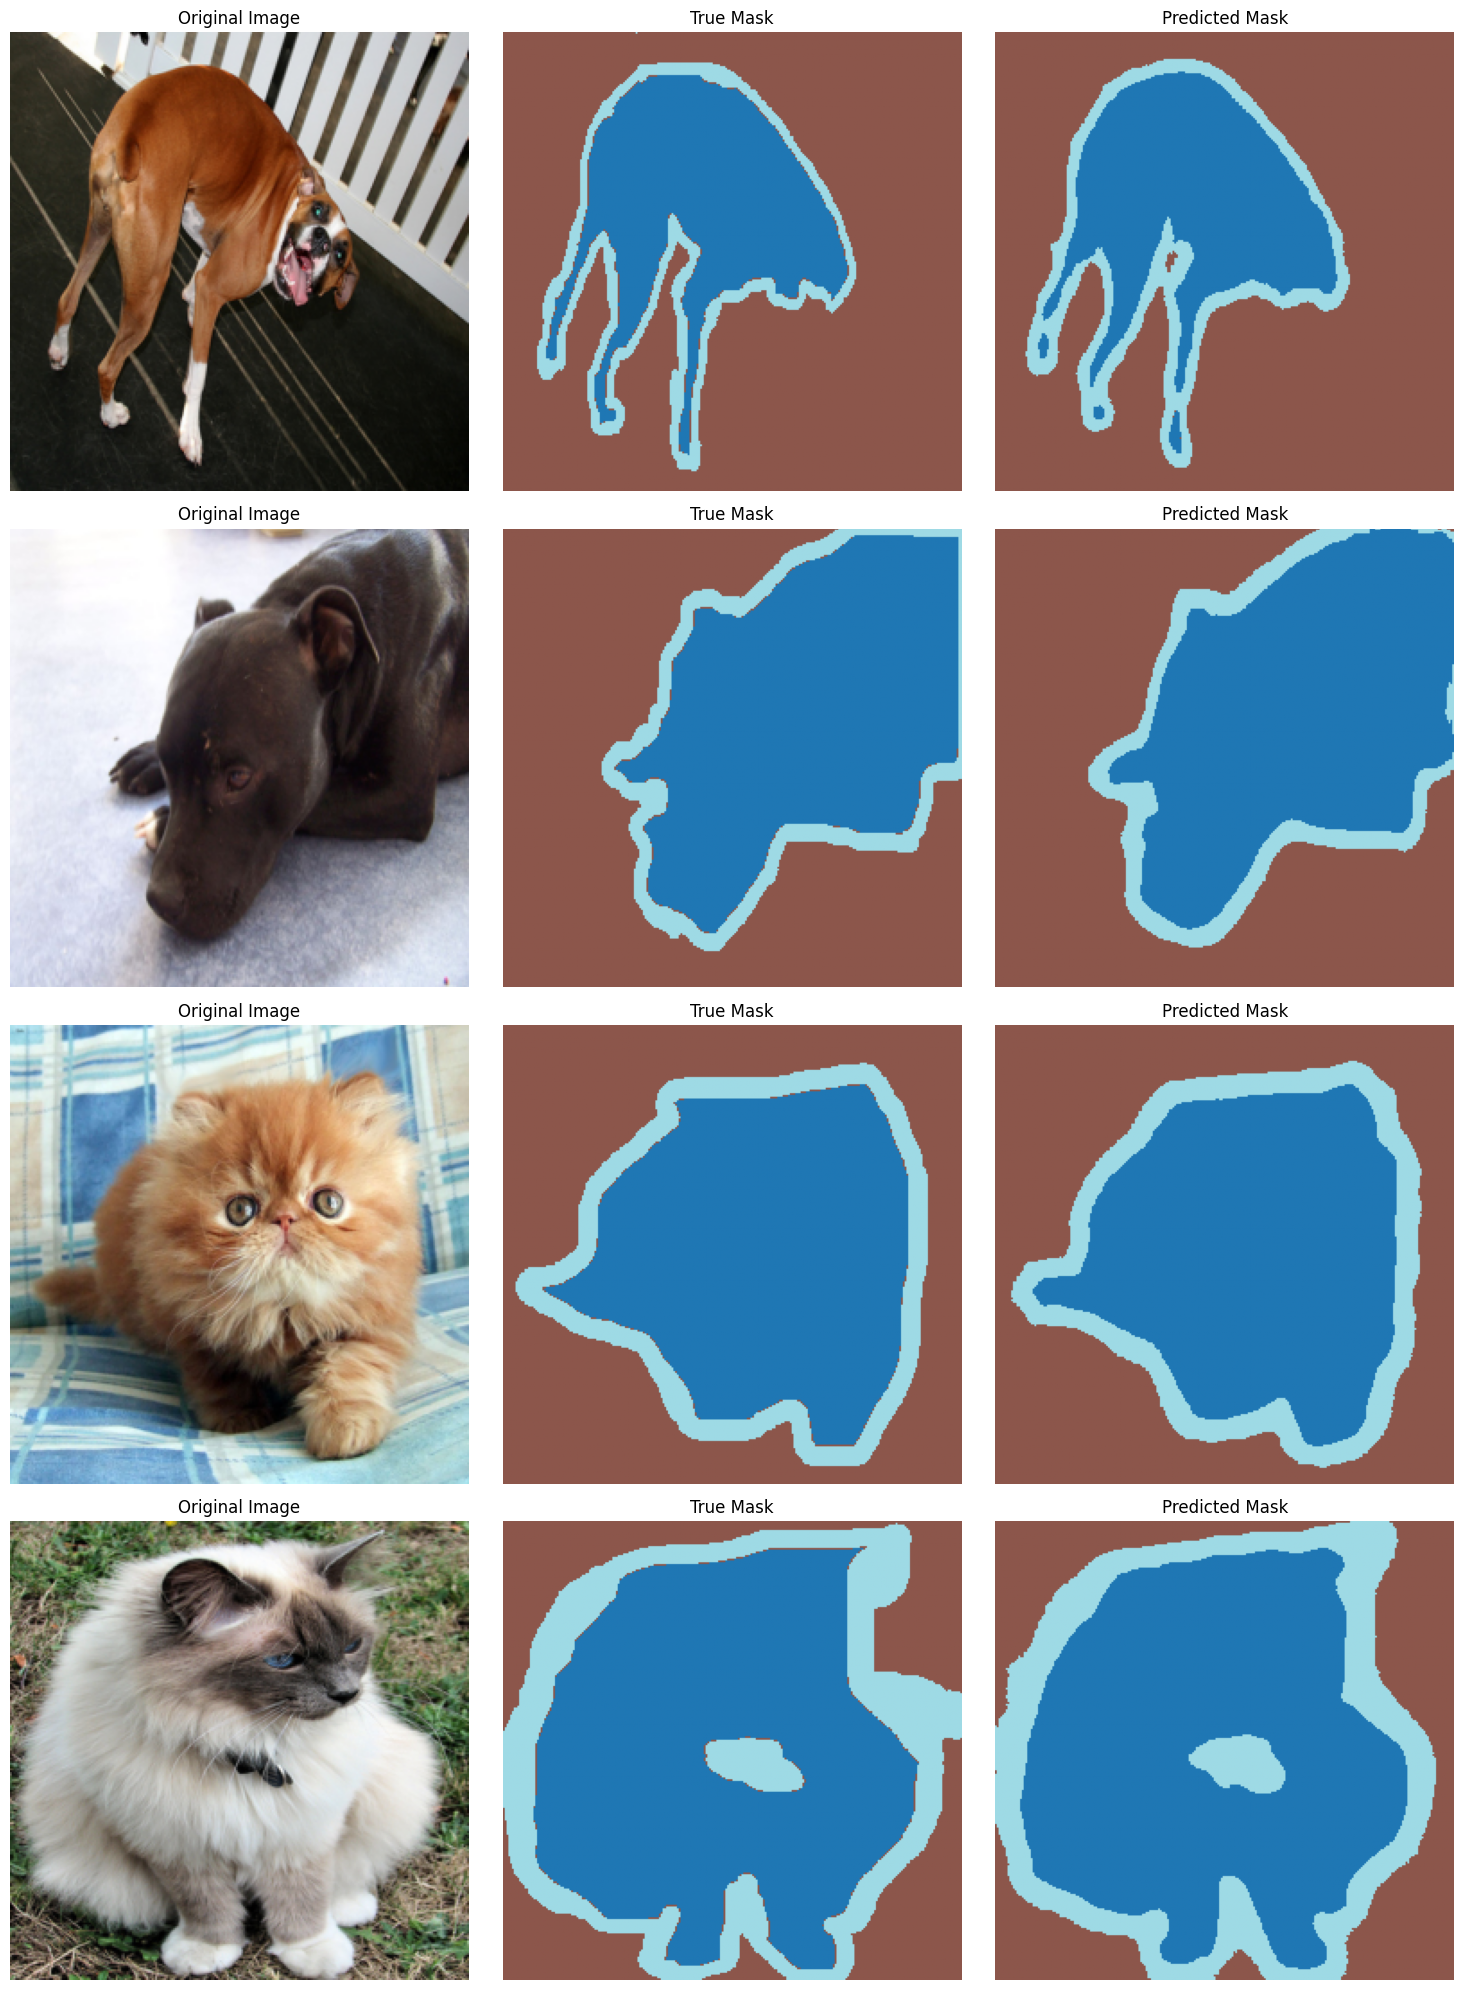

In [18]:
metrics = visualize_predictions(smp_model, (train_dataset))

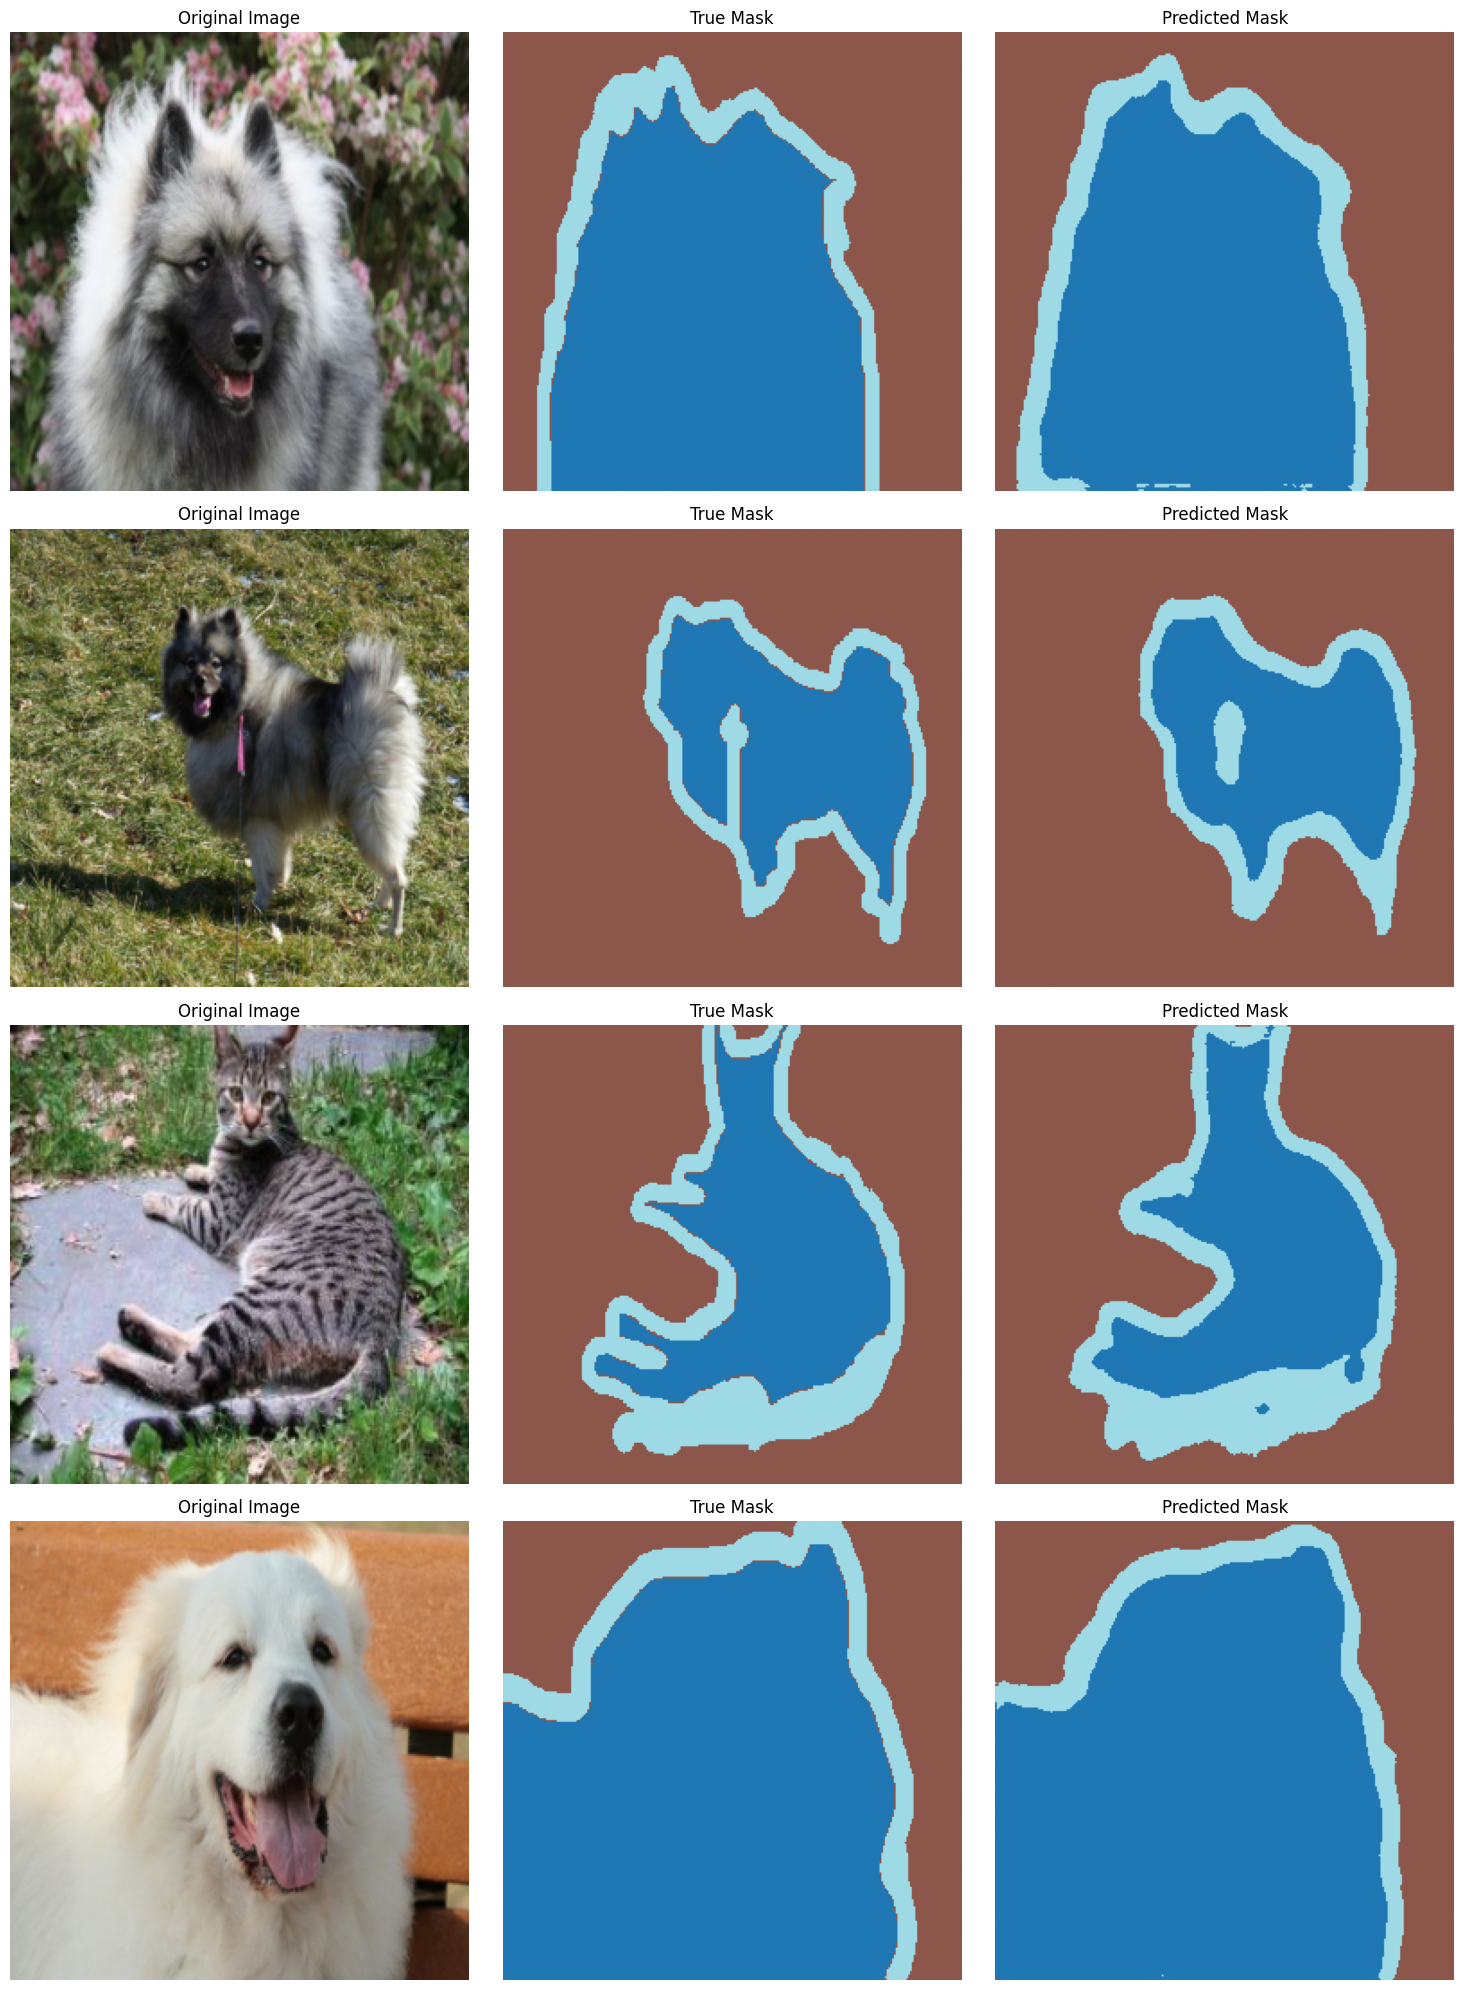

In [19]:
metrics = visualize_predictions(smp_model, (val_dataset))

In [20]:
evaluate_model_metrics(smp_model, val_dataloader, device)

 42%|████▏     | 10/24 [00:08<00:11,  1.22it/s]

100%|██████████| 24/24 [00:19<00:00,  1.25it/s]


Model Performance Metrics:
Accuracy: 0.9280
Recall: 0.8822
Jaccard Index: 0.7943
F1 Score: 0.8763


{'accuracy': 0.9279655177796484,
 'recall': 0.8821946177497028,
 'jaccard': np.float64(0.7942816261839525),
 'f1': 0.8762995633457122}

In [21]:
evaluate_model_metrics(smp_model, train_dataloader, device)

100%|██████████| 93/93 [01:16<00:00,  1.21it/s]


Model Performance Metrics:
Accuracy: 0.9627
Recall: 0.9395
Jaccard Index: 0.8832
F1 Score: 0.9350


{'accuracy': 0.9626996113902339,
 'recall': 0.9395233036709218,
 'jaccard': np.float64(0.8831511113010828),
 'f1': 0.9349627540340886}